In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
import pandas as pd
from keras import metrics

from sklearn.metrics import r2_score
plt.style.use(['seaborn-white'])

# 퀴즈

```
1. scatter , 예측선 그리기
2. 전기 생산량이 (3,4)인 경우 전기 사용량을 예측
3. 결정계수로 검증

```

In [2]:
df = pd.read_csv('tdata/electric.csv',index_col='Unnamed: 0') 
df.head(3)

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47


# 텐서

In [3]:
x = df['전기생산량']
y = df['전기사용량']

In [4]:

x=tf.constant(x, tf.float32)
y=tf.constant(y, tf.float32)

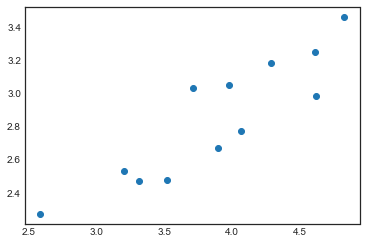

In [5]:
plt.scatter(x,y)

In [6]:
w=tf.Variable(tf.random.uniform([1]))
b=tf.Variable(tf.random.uniform([1]))

In [7]:
def compute_cost():
    hx=w*x+b
    cost=tf.reduce_mean((hx-y)**2)
    return cost

In [8]:
optimizer=Adam(learning_rate=0.01)
hist_cost=[]

for i in range(2000):
    optimizer.minimize(compute_cost ,var_list=[w,b] ) # w와 b에 대해 미분
    c=compute_cost().numpy()
    hist_cost.append(c)
    print(f'{i+1} cost={c}')

1 cost=2.2744064331054688
2 cost=2.1293249130249023
3 cost=1.9893159866333008
4 cost=1.854454517364502
5 cost=1.7248010635375977
6 cost=1.6004079580307007
7 cost=1.4813169240951538
8 cost=1.3675562143325806
9 cost=1.259142279624939
10 cost=1.1560770273208618
11 cost=1.058350920677185
12 cost=0.9659382700920105
13 cost=0.8787994980812073
14 cost=0.7968804240226746
15 cost=0.7201118469238281
16 cost=0.6484096646308899
17 cost=0.5816749930381775
18 cost=0.5197945237159729
19 cost=0.46264052391052246
20 cost=0.4100719392299652
21 cost=0.3619344234466553
22 cost=0.31806179881095886
23 cost=0.27827706933021545
24 cost=0.2423926442861557
25 cost=0.21021266281604767
26 cost=0.18153388798236847
27 cost=0.15614674985408783
28 cost=0.1338377445936203
29 cost=0.114390529692173
30 cost=0.09758774191141129
31 cost=0.08321238309144974
32 cost=0.07104991376399994
33 cost=0.060889650136232376
34 cost=0.0525263212621212
35 cost=0.04576139152050018
36 cost=0.04040464386343956
37 cost=0.03627508133649826


311 cost=0.027617285028100014
312 cost=0.027613507583737373
313 cost=0.027609730139374733
314 cost=0.027605945244431496
315 cost=0.027602141723036766
316 cost=0.027598390355706215
317 cost=0.027594586834311485
318 cost=0.02759082056581974
319 cost=0.027587033808231354
320 cost=0.027583232149481773
321 cost=0.027579449117183685
322 cost=0.0275756623595953
323 cost=0.027571870014071465
324 cost=0.027568085119128227
325 cost=0.02756427973508835
326 cost=0.027560487389564514
327 cost=0.027556708082556725
328 cost=0.027552908286452293
329 cost=0.02754911221563816
330 cost=0.027545316144824028
331 cost=0.027541516348719597
332 cost=0.027537712827324867
333 cost=0.027533909305930138
334 cost=0.027530105784535408
335 cost=0.027526304125785828
336 cost=0.027522502467036247
337 cost=0.027518698945641518
338 cost=0.027514904737472534
339 cost=0.027511095628142357
340 cost=0.027507295832037926
341 cost=0.027503490447998047
342 cost=0.027499690651893616
343 cost=0.02749587595462799
344 cost=0.02749

625 cost=0.02648385800421238
626 cost=0.02648070454597473
627 cost=0.026477545499801636
628 cost=0.02647438645362854
629 cost=0.02647124044597149
630 cost=0.026468081399798393
631 cost=0.026464959606528282
632 cost=0.026461822912096977
633 cost=0.026458686217665672
634 cost=0.026455556973814964
635 cost=0.026452437043190002
636 cost=0.026449307799339294
637 cost=0.026446184143424034
638 cost=0.02644309215247631
639 cost=0.0264399703592062
640 cost=0.026436859741806984
641 cost=0.026433773338794708
642 cost=0.026430664584040642
643 cost=0.026427576318383217
644 cost=0.026424497365951538
645 cost=0.026421425864100456
646 cost=0.026418328285217285
647 cost=0.026415258646011353
648 cost=0.02641218900680542
649 cost=0.02640911191701889
650 cost=0.0264060590416193
651 cost=0.026403004303574562
652 cost=0.026399940252304077
653 cost=0.02639690600335598
654 cost=0.026393862441182137
655 cost=0.026390811428427696
656 cost=0.026387786492705345
657 cost=0.026384739205241203
658 cost=0.02638170681

918 cost=0.025745538994669914
919 cost=0.025743672624230385
920 cost=0.025741806253790855
921 cost=0.02573993057012558
922 cost=0.02573809213936329
923 cost=0.02573624812066555
924 cost=0.02573440410196781
925 cost=0.025732574984431267
926 cost=0.025730730965733528
927 cost=0.025728898122906685
928 cost=0.025727078318595886
929 cost=0.025725247338414192
930 cost=0.025723420083522797
931 cost=0.025721604004502296
932 cost=0.02571980655193329
933 cost=0.025717981159687042
934 cost=0.02571619115769863
935 cost=0.025714388117194176
936 cost=0.025712599977850914
937 cost=0.025710811838507652
938 cost=0.025709038600325584
939 cost=0.025707239285111427
940 cost=0.02570546604692936
941 cost=0.02570370025932789
942 cost=0.025701917707920074
943 cost=0.02570016123354435
944 cost=0.025698402896523476
945 cost=0.025696642696857452
946 cost=0.025694897398352623
947 cost=0.02569313906133175
948 cost=0.025691384449601173
949 cost=0.025689654052257538
950 cost=0.025687923654913902
951 cost=0.025686189

1215 cost=0.02535770647227764
1216 cost=0.02535688318312168
1217 cost=0.025356054306030273
1218 cost=0.025355229154229164
1219 cost=0.025354424491524696
1220 cost=0.025353610515594482
1221 cost=0.025352800264954567
1222 cost=0.025352003052830696
1223 cost=0.02535117417573929
1224 cost=0.025350386276841164
1225 cost=0.025349581614136696
1226 cost=0.02534879744052887
1227 cost=0.02534799464046955
1228 cost=0.02534719742834568
1229 cost=0.02534639835357666
1230 cost=0.025345630943775177
1231 cost=0.025344841182231903
1232 cost=0.02534404955804348
1233 cost=0.025343289598822594
1234 cost=0.02534249611198902
1235 cost=0.02534172683954239
1236 cost=0.025340944528579712
1237 cost=0.025340192019939423
1238 cost=0.025339430198073387
1239 cost=0.02533864974975586
1240 cost=0.025337889790534973
1241 cost=0.02533712238073349
1242 cost=0.02533637546002865
1243 cost=0.025335630401968956
1244 cost=0.025334864854812622
1245 cost=0.025334134697914124
1246 cost=0.025333384051918983
1247 cost=0.025332644

1523 cost=0.02520243637263775
1524 cost=0.02520217001438141
1525 cost=0.025201931595802307
1526 cost=0.025201665237545967
1527 cost=0.02520139515399933
1528 cost=0.02520115114748478
1529 cost=0.02520088292658329
1530 cost=0.025200635194778442
1531 cost=0.025200380012392998
1532 cost=0.0252001341432333
1533 cost=0.02519986964762211
1534 cost=0.02519962005317211
1535 cost=0.025199366733431816
1536 cost=0.025199145078659058
1537 cost=0.025198882445693016
1538 cost=0.025198625400662422
1539 cost=0.025198377668857574
1540 cost=0.025198137387633324
1541 cost=0.025197898969054222
1542 cost=0.025197641924023628
1543 cost=0.025197403505444527
1544 cost=0.025197161361575127
1545 cost=0.025196917355060577
1546 cost=0.025196686387062073
1547 cost=0.025196442380547523
1548 cost=0.025196202099323273
1549 cost=0.025195958092808723
1550 cost=0.025195732712745667
1551 cost=0.02519550360739231
1552 cost=0.025195270776748657
1553 cost=0.0251950453966856
1554 cost=0.0251948032528162
1555 cost=0.0251945853

1834 cost=0.025158576667308807
1835 cost=0.02515849657356739
1836 cost=0.02515844814479351
1837 cost=0.025158390402793884
1838 cost=0.02515833079814911
1839 cost=0.025158261880278587
1840 cost=0.025158217176795006
1841 cost=0.025158151984214783
1842 cost=0.025158097967505455
1843 cost=0.025158032774925232
1844 cost=0.025157982483506203
1845 cost=0.025157928466796875
1846 cost=0.0251578688621521
1847 cost=0.025157814845442772
1848 cost=0.02515774965286255
1849 cost=0.025157712399959564
1850 cost=0.025157639756798744
1851 cost=0.025157585740089417
1852 cost=0.025157542899250984
1853 cost=0.025157475844025612
1854 cost=0.025157421827316284
1855 cost=0.02515738271176815
1856 cost=0.025157326832413673
1857 cost=0.025157272815704346
1858 cost=0.025157222524285316
1859 cost=0.02515716850757599
1860 cost=0.025157099589705467
1861 cost=0.025157058611512184
1862 cost=0.025157002732157707
1863 cost=0.025156952440738678
1864 cost=0.0251569002866745
1865 cost=0.025156855583190918
1866 cost=0.025156

In [10]:
def hxFn(x):
    hx=w*x+b 
    return hx.numpy()

In [12]:
hxFn([3,4])

array([2.4035287, 2.902091 ], dtype=float32)

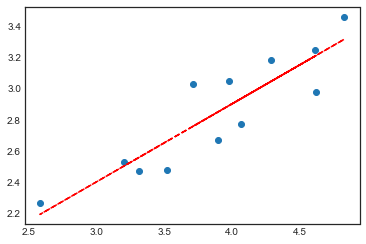

In [13]:
plt.scatter(x, y)
plt.plot(x,hxFn(x), 'r--')

In [14]:
# r2
r2_score(y, hxFn(x))

0.7972835232713458

# 케라스

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
dense=Dense(units=1, input_dim=1) #w,b 초기값
model=Sequential([dense])
model.compile(loss='mse', optimizer=Adam(0.01))
h=model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 180ms/step - loss: 11.4171
Epoch 2/500
1/1 [==============================] - 0s 998us/step - loss: 11.0870
Epoch 3/500
1/1 [==============================] - 0s 997us/step - loss: 10.7620
Epoch 4/500
1/1 [==============================] - 0s 999us/step - loss: 10.4419
Epoch 5/500
1/1 [==============================] - 0s 998us/step - loss: 10.1270
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 9.8174
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 9.5130
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 9.2140
Epoch 9/500
1/1 [==============================] - 0s 997us/step - loss: 8.9205
Epoch 10/500
1/1 [==============================] - 0s 998us/step - loss: 8.6324
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 8.3498
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 8.0728
Epoch 13/500
1/1 [========================

1/1 [==============================] - 0s 996us/step - loss: 0.0572
Epoch 104/500
1/1 [==============================] - 0s 997us/step - loss: 0.0543
Epoch 105/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 106/500
1/1 [==============================] - 0s 997us/step - loss: 0.0492
Epoch 107/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 108/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 109/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 110/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0415
Epoch 111/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 112/500
1/1 [==============================] - 0s 996us/step - loss: 0.0386
Epoch 113/500
1/1 [==============================] - 0s 998us/step - loss: 0.0373
Epoch 114/500
1/1 [==============================] - 0s 998us/step - loss: 0.0362
Epoch 115/500
1/1 [=======================

Epoch 204/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 205/500
1/1 [==============================] - 0s 996us/step - loss: 0.0265
Epoch 206/500
1/1 [==============================] - 0s 998us/step - loss: 0.0265
Epoch 207/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 208/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 209/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 210/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 211/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 212/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 213/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 214/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 215/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 216/500
1/1 [=====

1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 305/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 306/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 307/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 308/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 309/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 310/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 311/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 312/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 313/500
1/1 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 314/500
1/1 [==============================] - 0s 996us/step - loss: 0.0265
Epoch 315/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 316/500
1/1 [===========================

1/1 [==============================] - 0s 997us/step - loss: 0.0264
Epoch 406/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 407/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 408/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 409/500
1/1 [==============================] - 0s 994us/step - loss: 0.0264
Epoch 410/500
1/1 [==============================] - 0s 996us/step - loss: 0.0264
Epoch 411/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 412/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 413/500
1/1 [==============================] - 0s 996us/step - loss: 0.0264
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 415/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 416/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 417/500
1/1 [===========================

In [17]:
w,b=dense.get_weights()

In [18]:
model.predict([3,4])

array([[2.354288 ],
       [2.9037447]], dtype=float32)

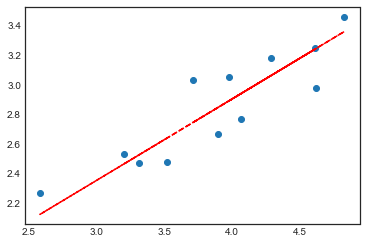

In [19]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r--')

In [20]:
#결정계수
r2_score(y, model.predict(x))

0.787739169180642

mse  1 - 편차제곱합 / 오차제곱합  
MSE 값이 작 으면 예측 결과와 관찰 결과가 더 일치하며 MSE가 0.0이면 완전한 일치